In [12]:
import lightkurve as lk

from lightkurve import search_targetpixelfile, search_lightcurve 
from lightkurve.periodogram import LombScarglePeriodogram

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.timeseries import BoxLeastSquares

import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [14]:
def find_period(KIC):
    lc = search_lightcurve('KIC ' + str(KIC), author="Kepler", cadence="long").download()
    periodogram = LombScarglePeriodogram.from_lightcurve(lc)
    return periodogram.period_at_max_power/u.d

In [15]:
duration = 0.1

def find_period_BLS(KIC):
    lc = search_lightcurve('KIC ' + str(KIC), author="Kepler", cadence="long").download()
    periodogram = BoxLeastSquares.from_timeseries(lc, signal_column_name='flux')
    results = periodogram.autopower(duration*u.day)
    best = np.argmax(results.power)
    return results.period[best] / u.d

In [16]:
data = pd.read_csv('lurie_ebs.csv')

In [ ]:
data['P_LS'] = data['KIC'].apply(find_period)
data['P_BLS'] = data['KIC'].apply(find_period_BLS)

In [21]:
data.to_csv('BLS_01.csv', index=False)

In [17]:
dur_1 = pd.read_csv('BLS_01.csv')
dur_5 = pd.read_csv('BLS_05.csv')
dur_10 = pd.read_csv('BLS_10.csv')

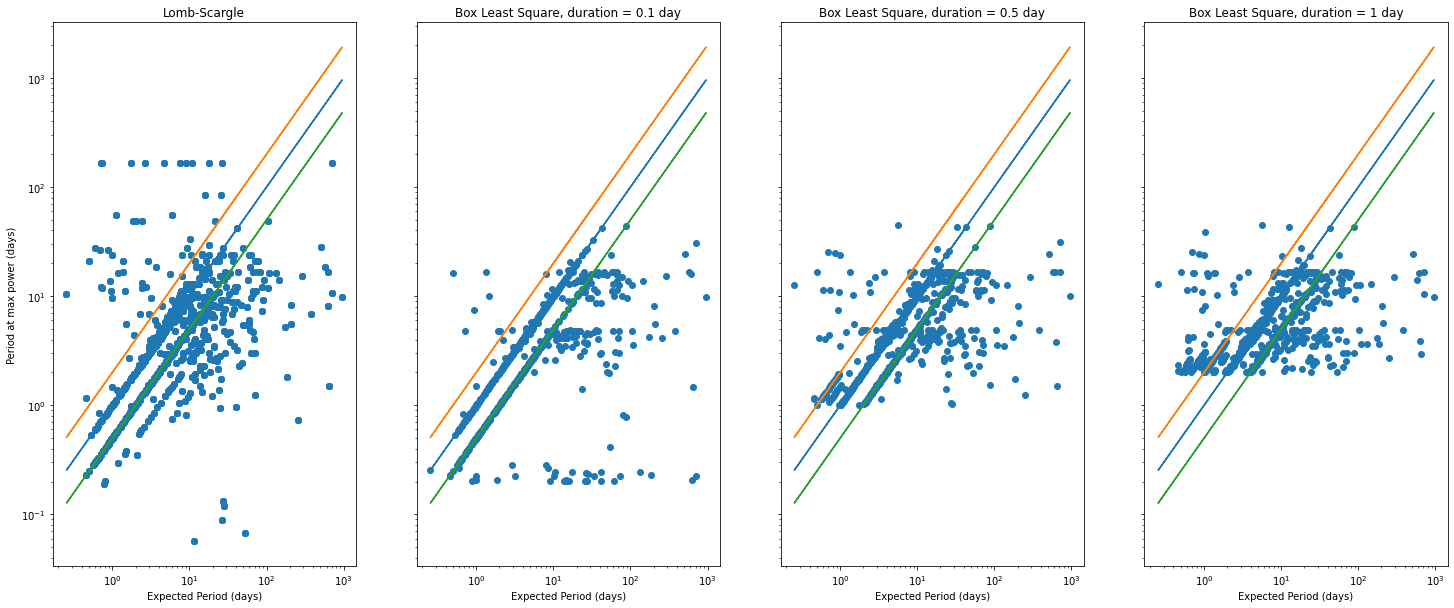

In [20]:
fig, ax = plt.subplots(1,4,figsize=(25,10), sharey=True)
ax[0].scatter(x=merged_df['Porb'], y=merged_df['P_LS'])
ax[1].scatter(x=dur_1['Porb'], y=dur_1['P_BLS'])
ax[2].scatter(x=dur_5['Porb'], y=dur_5['P_BLS'])
ax[3].scatter(x=dur_10['Porb'], y=dur_10['P_BLS'])

for n in range(4):
    ax[n].plot(merged_df['Porb'], merged_df['Porb'])
    ax[n].plot(merged_df['Porb'], merged_df['Porb']*2)
    ax[n].plot(merged_df['Porb'], merged_df['Porb']*0.5)
    ax[n].set_yscale('log')
    ax[n].set_xscale('log')
    ax[n].set_xlabel('Expected Period (days)')

ax[0].set_ylabel('Period at max power (days)')
ax[0].set_title('Lomb-Scargle')
ax[1].set_title('Box Least Square, duration = 0.1 day')
ax[2].set_title('Box Least Square, duration = 0.5 day')
ax[3].set_title('Box Least Square, duration = 1 day')
# plt.legend()
plt.savefig('periods.png');